In [14]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow
import cv2
import pandas as pd
import zipfile
import pathlib
import os
import PIL
import numpy as np

In [15]:
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ANN Project/ChestXray')
print(data_dir)

/content/drive/MyDrive/Colab Notebooks/ANN Project/ChestXray


In [16]:
image_count = 0
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        #print(f"{class_dir}: {num_images} görsel")
        image_count += num_images
print(image_count)

3288


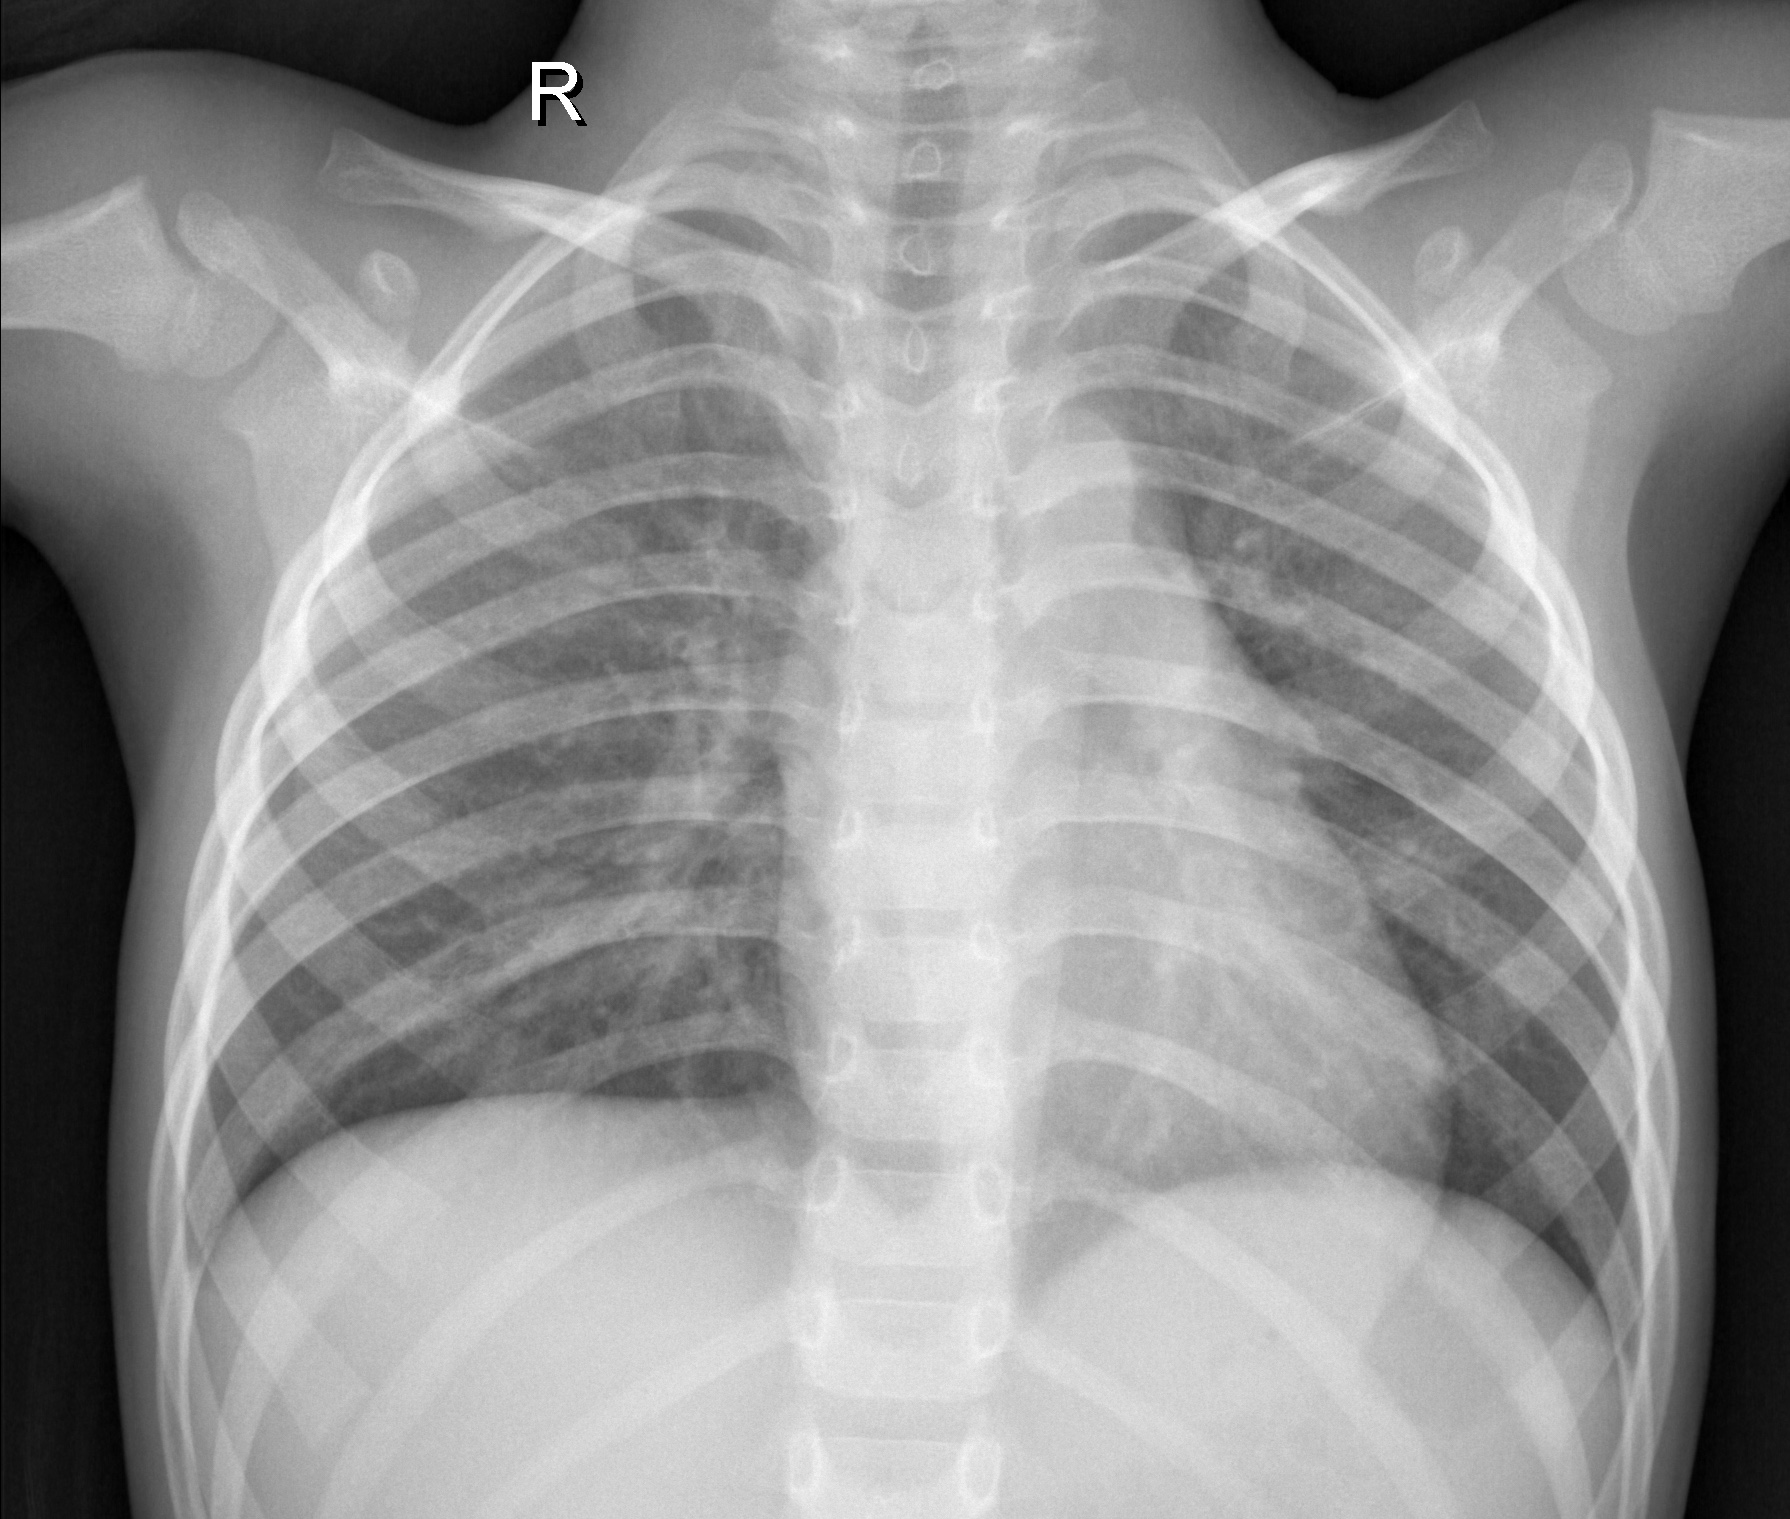

In [17]:
normal_images = list(data_dir.glob('Normal/*'))
PIL.Image.open(str(normal_images[0]))

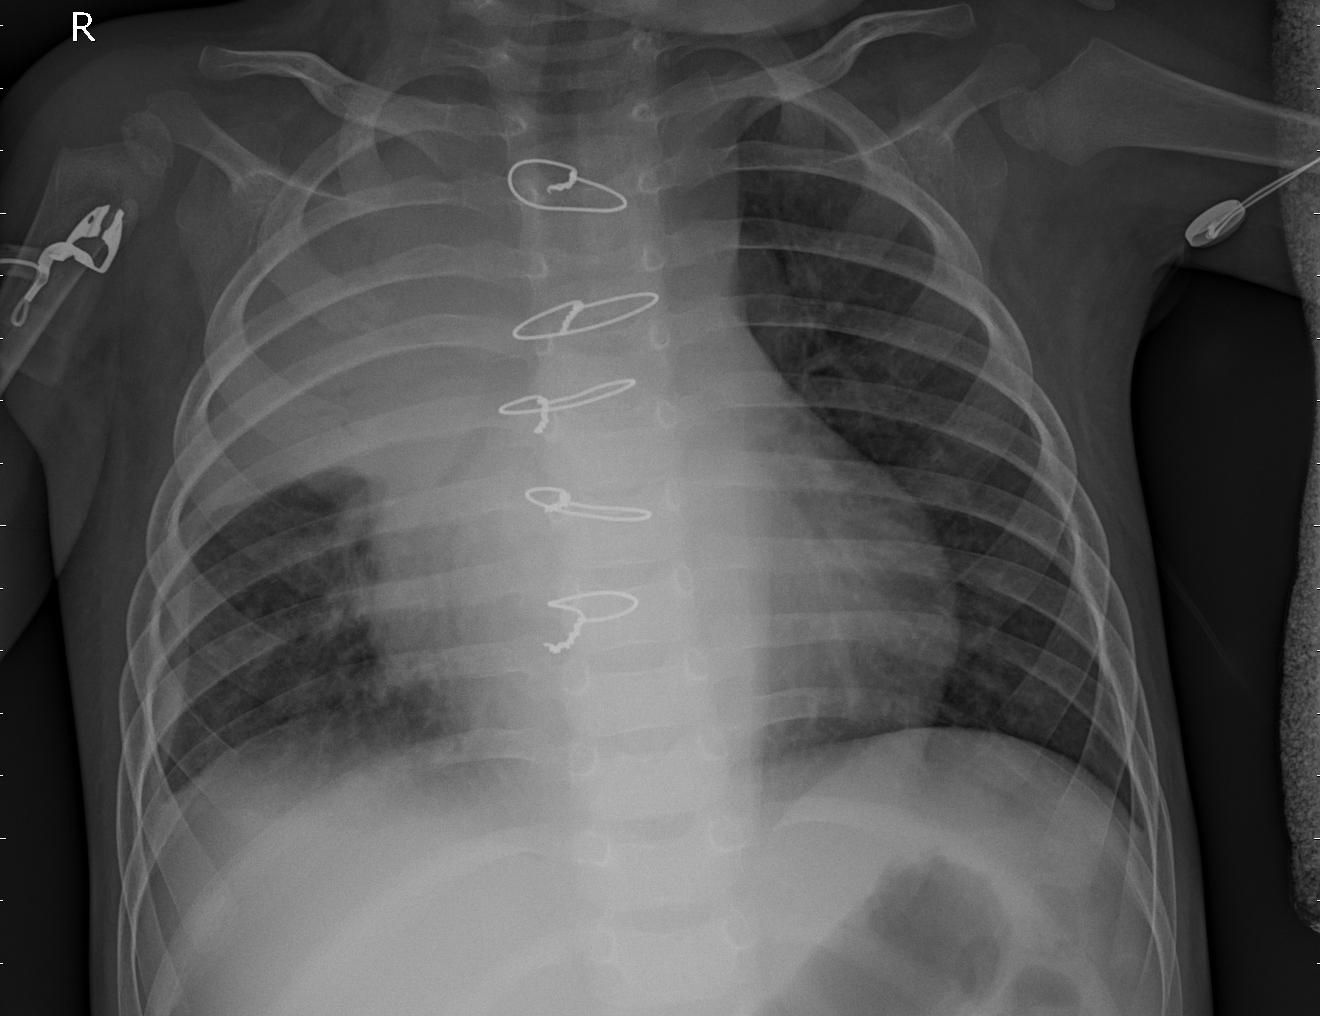

In [18]:
pneumonia_images = list(data_dir.glob('Pneumonia/*'))
PIL.Image.open(str(pneumonia_images[0]))

In [19]:
img_height = 200
img_width = 200
batch_size = 32

In [20]:
train_dset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         seed=1025,
                                                         image_size=(img_height, img_width)
                                                         ,batch_size=batch_size
                                                         )

val_dset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=1025,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size
                                                       )

Found 3288 files belonging to 2 classes.
Using 2631 files for training.
Found 3288 files belonging to 2 classes.
Using 657 files for validation.


In [21]:
class_names1 = train_dset.class_names
print("Sınıflar:", class_names1)

Sınıflar: ['Normal', 'Pneumonia']


In [22]:
class_names2 = val_dset.class_names
print("Sınıflar:", class_names2)

Sınıflar: ['Normal', 'Pneumonia']


In [23]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([layers.Input(shape=(img_height, img_width, 3)),
                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # normalize
                    layers.Conv2D(16, (3, 3), activation='relu'),  # tek gizli katman
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(1, activation='sigmoid')  # binary classification
                    ])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 156816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       156,817 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,265 (614.32 KB)

 Trainable params: 157,265 (614.32 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [26]:
epochs = 30

history = model.fit(train_dset,
                    validation_data=val_dset,
                    epochs=epochs
                    )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 542s 7s/step - accuracy: 0.6343 - loss: 2.1441 - val_accuracy: 0.8782 - val_loss: 0.2677
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 56s 431ms/step - accuracy: 0.9327 - loss: 0.2025 - val_accuracy: 0.9300 - val_loss: 0.1804
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 430ms/step - accuracy: 0.9496 - loss: 0.1377 - val_accuracy: 0.8752 - val_loss: 0.3211
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 431ms/step - accuracy: 0.9483 - loss: 0.1314 - val_accuracy: 0.9224 - val_loss: 0.1707
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.9585 - loss: 0.1043 - val_accuracy: 0.9315 - val_loss: 0.1690
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 437ms/step - accuracy: 0.9731 - loss: 0.0763 - val_accuracy: 0.9361 - val_loss: 0.1643
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.9855 - loss: 0.0556 - val_accuracy: 0.9346 - val_loss: 0.1750
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 438ms/step - accuracy: 0.9916 - loss: 0.0474 - val_accura

In [29]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

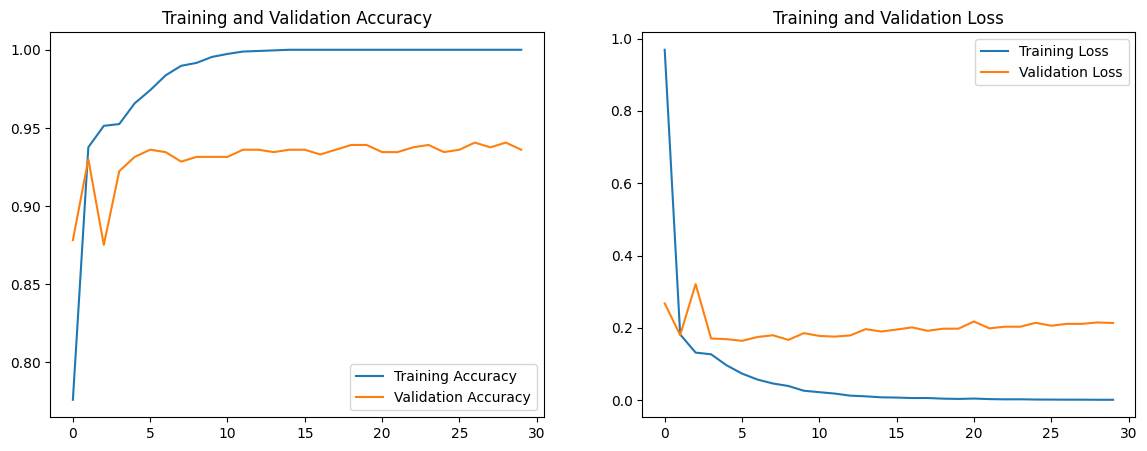

In [30]:
plot_training_curves(history)

In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/ANN Project/Saved Models/CNN1.h5')